In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['STHeiti']
mpl.rcParams['font.serif'] = ['STHeiti']
import seaborn as sns
sns.set_style("darkgrid",{"font.sans-serif":['STHeiti', 'STHeiti']})
# Set Default Encoding
import sys
stdout = sys.stdout
reload(sys)
sys.setdefaultencoding('utf-8')
sys.stdout = stdout

# 概述
最近一段时间学习了爬虫以及 pandas 的使用，考虑到结合实际案例能够加深学习，准备爬取一些数据练习数据分析。有了这些想法就开始着手干活，最终决定爬取基金的相关数据，并简单分析，达到练习爬虫和 pandas 的目的。  
爬取的数据分为两大类，一类为基金相关信息，另一类为基金涨跌幅数据。通过对这些数据的分析，看看会有哪些有意思的事情。

## 工具
Python库：numpy/pandas/matplotlib/seaborn/   

Python交互环境：Ipython notebook

## 目的
熟悉 pandas 的使用，初探数据分析的具体内容。

# 数据
## 概况
数据来源于天天基金网，经过简单处理分为两类：
* 基金信息 (funds.csv)
* 基金日涨跌幅数据 

经过初步筛选，实际用于练手的数据为混合型基金：
* 混合型基金信息 (mixed_funds.csv)
* 混合型基金日涨跌幅数据 (mixed_funds_rate.csv)

## 数据信息
一、先查看一下所有基金的信息。

In [2]:
funds = pd.read_csv('./data/funds.csv',dtype={'code':str})
funds.head()

,code,name,type,manager,company
0,000001,华夏成长,混合型,董阳阳,华夏基金
1,000003,中海可转债A,债券型,江小震,中海基金
2,000004,中海可转债C,债券型,江小震,中海基金
3,000005,嘉实增强信用定期债券,定开债券,刘宁,嘉实基金
4,000007,鹏华国企债债券,债券型,刘涛,鹏华基金


文件中包含基金信息，数据共包含五列，分别为基金代码、基金名字、类型、经理和管理公司。  

二、再来看一下所有基金的统计情况。

In [3]:
funds.describe()

,code,name,type,manager,company
count,6719,6719,6719,6719,6719
unique,6719,6678,19,1324,123
top,519332,信诚中证800金融指数分级,混合型,许强,博时基金
freq,1,3,2609,53,257


共 6719 个基金，总共 19 个类型，经理为 1324 个 (可能存在重名情况，本文忽略)，管理公司为 123 个。 其中基金最多的类型为混合型，共有 2609 只，管理基金最多的经理为许强，共 53 只 ，管理基金最多的公司为博时基金。
### 基金类型
基金的分析是一个很复杂的问题，首先考虑的是不同类型的基金，因为不同类型的基金收益和风险的基准都不一致，先查看一下所有基金的类型分布，并用图形表示。

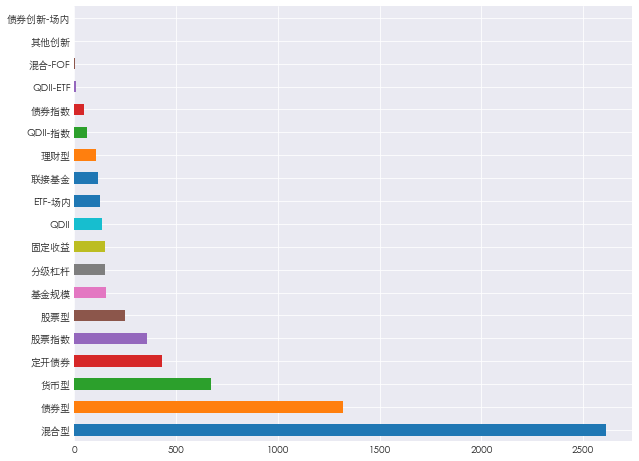

In [4]:
funds['type'].value_counts().plot(kind='barh',figsize=(10,8))
plt.savefig('/Users/lli/Downloads/1.png',dpi=600)

可以看到，基金类型细分为 19 个类型，其中最多的为混合型。总的来说，大部分基金为中低风险中低收益类型，如混合型、债券型、货币型等。考虑到不同类型基金可比性不高，挑选混合型的基金出来分析。其原因有：
* 同一类型的基金更具有可比性，评价会更合理；
* 混合型基金的数量较多；
* 相比于货币型、债券型，混合型基金的风险和收益都高，更具有分析价值。

### 混合型基金
一、先挑选出混合型基金，并查看统计信息

In [5]:
mixed_funds = funds[funds['type']==u"混合型"]
mixed_funds.describe()

,code,name,type,manager,company
count,2609,2609,2609,2609,2609
unique,2609,2606,1,884,114
top,001823,中欧行业成长混合(LOF),混合型,樊利安,鹏华基金
freq,1,3,2609,42,80


884 个经理，114 家公司管理 1609 只混合型基金。与所有基金统计情况相比，约 66% 的经理都参与了混合型基金，93% 的公司都有混合型基金。可以看得出来，市场上最受欢迎的是混合型基金，其风险中高，收益中高。

二、管理混合型最多的经理和公司

网络上说，挑选基金主要看经理和公司。我们先查看一下管理混合型最多的经理和公司。

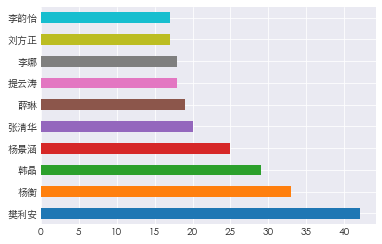

In [9]:
mixed_funds['manager'].value_counts()[:10].plot('barh')
plt.savefig('/Users/lli/Downloads/1.png',dpi=300)

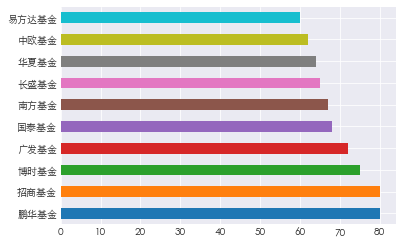

In [10]:
mixed_funds['company'].value_counts()[:10].plot(kind='barh')
plt.savefig('/Users/lli/Downloads/1.png',dpi=300)

# 小结

大体上查看了所有基金的信息，并挑选出混合型基金作为后续研究。这里先将混合型基金信息保存为 mixed_funds.csv，之后结合其涨跌幅数据，进行下一步分析。

In [8]:
mixed_funds.to_csv('mixed_funds.csv',index=False)